In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Read the flattened light curve
data = np.genfromtxt('/home/adri/Desktop/Astrolab2/TESS_notebook/WASP44_PDCSAP_flattened_biweight.dat')
# You can use "panda" as well, this is the simplest way since we are not dealing with complex databases

time = data[:,0]
flux = data[:,1]
flux_err = data[:,2]

In [3]:
# Copy here from BLS/TLS analysis:
# 1) time of reference transit
# 2) orbital period
# 3) transit duration

transit_time = 2458386.57243
orbital_period = 2.42578
transit_duration = 0.07239

In [4]:
# phase fold plot:
phase = (time - transit_time) % orbital_period / orbital_period
phase[np.where(phase>0.5)] -= 1 

In [5]:
# We compute a Boolean array that is true only for the points that are
# twice the transit duration (converted in phase) within the center 
# of the transit (corresponding to phase=0)
transit_duration_in_phase =  transit_duration / orbital_period
phase_selection = np.abs(phase) < 2*transit_duration_in_phase


<IPython.core.display.Javascript object>


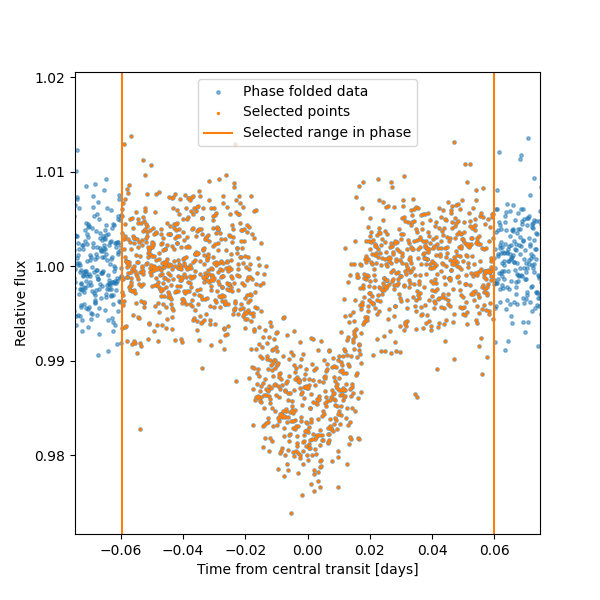

In [6]:
# We plot the results

plt.figure(figsize=(6,6))
plt.scatter(phase, flux, c='C0', s=6, alpha=0.5, label='Phase folded data')
plt.scatter(phase[phase_selection], flux[phase_selection], c='C1', s=2, label='Selected points')


plt.axvline(-2* transit_duration_in_phase, c='C1', label='Selected range in phase')
plt.axvline( 2* transit_duration_in_phase, c='C1')
plt.legend()

# Zoom on the interesting part (but use your cursor to explore the whole plot!)
plt.xlim(-2.5*transit_duration_in_phase, 2.5*transit_duration_in_phase)


plt.xlabel("Time from central transit [days]")
plt.ylabel("Relative flux");

In [7]:
# Save the output to a PyORBIT-compliant file
# removal of 2450000.0 constant is optional, just be SURE to be
# self-consistent with your configuration file

fileout = open('WASP44_TESS_PyORBIT.dat', 'w')
for b, v, e in zip(time[phase_selection]-2450000.0, 
                   flux[phase_selection],
                   flux_err[phase_selection]):
    fileout.write('{0:16f} {1:12f} {2:12f} 0 \n'.format(b,v,e))
fileout.close()